In [1]:
pip install opencv-python ultralytics

Note: you may need to restart the kernel to use updated packages.


In [20]:
import cv2
from ultralytics import YOLO

In [31]:
import cv2
import numpy as np
from ultralytics import YOLO

# YOLO 모델 로드
model = YOLO('yolov10m.pt')  # 또는 다른 YOLO 모델을 사용할 수 있습니다

def detect_horse(image_path):
    # 이미지 로드
    image = cv2.imread(image_path)
    
    # YOLO로 객체 감지
    results = model(image)
    
    # 결과 처리
    for result in results:
        boxes = result.boxes.cpu().numpy()
        for box in boxes:
            cls = int(box.cls[0])
            conf = box.conf[0]
            
            # COCO 데이터셋에서 말(horse)의 클래스 ID는 17입니다
            if cls == 17 and conf > 0.5:  # 신뢰도 임계값을 0.5로 설정
                return True
    
    return False

def process_images(image_folder, output_folder):
    import os
    from pathlib import Path
    
    # 출력 폴더가 없으면 생성
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, filename)
            
            if detect_horse(image_path):
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, cv2.imread(image_path))
                print(f"말이 감지되어 저장됨: {output_path}")

# 사용 예시
image_folder = '/RnD/horse/2_2_2_org/'
output_folder = '/RnD/horse/2_2_2_del/'
process_images(image_folder, output_folder)


0: 384x640 2 persons, 8 cars, 1 bus, 1 bench, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 0.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8 cars, 1 bus, 3.9ms
Speed: 0.9ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 8 cars, 1 bus, 1 bench, 3.9ms
Speed: 0.9ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 8 cars, 1 bench, 1 horse, 3.9ms
Speed: 0.8ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 7 cars, 1 bus, 3.9ms
Speed: 0.8ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 6 cars, 1 bus, 1 bench, 3.9ms
Speed: 0.8ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 horse, 3.9ms
Speed: 0.8ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 38

In [21]:
lst

['/RnD/horse/3_2_org/image_434.jpg',
 '/RnD/horse/3_2_org/image_420.jpg',
 '/RnD/horse/3_2_org/image_470.jpg',
 '/RnD/horse/3_2_org/image_441.jpg',
 '/RnD/horse/3_2_org/image_7.jpg',
 '/RnD/horse/3_2_org/image_460.jpg',
 '/RnD/horse/3_2_org/image_39.jpg',
 '/RnD/horse/3_2_org/image_467.jpg',
 '/RnD/horse/3_2_org/image_32.jpg',
 '/RnD/horse/3_2_org/image_41.jpg',
 '/RnD/horse/3_2_org/image_480.jpg',
 '/RnD/horse/3_2_org/image_450.jpg',
 '/RnD/horse/3_2_org/image_445.jpg',
 '/RnD/horse/3_2_org/image_451.jpg',
 '/RnD/horse/3_2_org/image_26.jpg',
 '/RnD/horse/3_2_org/image_33.jpg',
 '/RnD/horse/3_2_org/image_9.jpg',
 '/RnD/horse/3_2_org/image_424.jpg',
 '/RnD/horse/3_2_org/image_442.jpg',
 '/RnD/horse/3_2_org/image_5.jpg',
 '/RnD/horse/3_2_org/image_439.jpg',
 '/RnD/horse/3_2_org/image_471.jpg',
 '/RnD/horse/3_2_org/image_423.jpg',
 '/RnD/horse/3_2_org/image_440.jpg',
 '/RnD/horse/3_2_org/image_43.jpg',
 '/RnD/horse/3_2_org/image_477.jpg',
 '/RnD/horse/3_2_org/image_443.jpg']

In [27]:
lst = []

In [53]:
## 비율

import cv2
import numpy as np
from ultralytics import YOLO
from pathlib import Path
import os

# YOLO 모델 로드
model = YOLO('yolov10m.pt')  # 또는 다른 YOLO 모델을 사용할 수 있습니다

def is_horse_fully_visible(box, image_shape):
    """
    말이 이미지 경계에 너무 가까이 있는지 확인하고,
    바운딩 박스의 가로 비율이 세로보다 긴지 확인합니다.
    """
    height, width = image_shape[:2]
    x1, y1, x2, y2 = box
    
    # 바운딩 박스의 너비와 높이 계산
    box_width = x2 - x1
    box_height = y2 - y1
    
    # 가로 비율이 더 긴지 확인
    return box_width > box_height

def detect_horse(image_path):
    # 이미지 로드
    image = cv2.imread(image_path)
    
    # YOLO로 말(horse) 객체만 감지
    results = model(image, classes=[17])  # 17은 COCO 데이터셋에서 말(horse)의 클래스 ID
    
    # 결과 처리
    for result in results:
        boxes = result.boxes.cpu().numpy()
        for box in boxes:
            conf = box.conf[0]
            
            if conf > 0.5:  # 신뢰도 임계값을 0.5로 설정
                if is_horse_fully_visible(box.xyxy[0], image.shape):
                    return True
    
    return False

# 사용 예시
image_folder = '/RnD/horse/5_2_org/'
output_folder = '/RnD/horse/5_2_del/'
batch_size = 500
image_paths = [str(path) for path in Path(image_folder).glob('*') if path.suffix.lower() in ['.jpg']]
print(len(image_paths))
Path(output_folder).mkdir(parents=True, exist_ok=True)


for image_path in image_paths[6000:]:
    if detect_horse(image_path):
        output_path = Path(output_folder) / Path(image_path).name
        cv2.imwrite(str(output_path), cv2.imread(image_path))
        lst.append(image_path.split('/')[-1].split('_')[-1])

7379

0: 384x640 1 horse, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 horse, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 horse, 6.2ms
Speed: 1.0ms preprocess, 6.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 horse, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 horse, 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.2ms postprocess per image at shape (1, 

In [33]:
len(lst)

115

In [75]:
import cv2
import numpy as np
from ultralytics import YOLO
import pandas as pd
import os
from pathlib import Path

# YOLO 모델 로드
model = YOLO('yolov8m.pt')  # 또는 다른 YOLO 모델을 사용할 수 있습니다

def detect_horses(image_path):
    # 이미지 로드
    image = cv2.imread(image_path)
    
    # YOLO로 객체 감지
    results = model(image)
    
    horses = []
    for result in results:
        boxes = result.boxes.cpu().numpy()
        for box in boxes:
            cls = int(box.cls[0])
            conf = box.conf[0]
            
            # COCO 데이터셋에서 말(horse)의 클래스 ID는 17입니다
            if cls == 17 and conf > 0.6:  # 신뢰도 임계값을 0.5로 설정
                x1, y1, x2, y2 = box.xyxy[0]
                horses.append((int(x1), int(y1), int(x2), int(y2)))
    
    return horses

def process_images(image_folder):
    data = []
    
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, filename)
            
            horses = detect_horses(image_path)
            
            if horses:
                for (x1, y1, x2, y2) in horses:
                    data.append({
                        'filename': filename,
                        'x': x1,
                        'y': y1,
                        'w': x2 - x1,
                        'h': y2 - y1
                    })
                
                print(f"말이 감지됨: {filename}")
    
    return pd.DataFrame(data)

# 사용 예시
folder = '4_2'
image_folder = f'/RnD/horse/{folder}_del/'
df = process_images(image_folder)

# DataFrame 출력
print(df)

# CSV 파일로 저장
csv_path = f'{folder}_horse_bbox.csv'
df.to_csv(csv_path, index=False)
print(f"결과가 {csv_path}에 저장되었습니다.")


0: 384x640 3 persons, 6 cars, 1 truck, 1 horse, 4.2ms
Speed: 1.1ms preprocess, 4.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_2404.jpg

0: 384x640 2 persons, 9 cars, 1 truck, 1 horse, 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_1822.jpg

0: 384x640 1 person, 9 cars, 2 benchs, 2 horses, 4.1ms
Speed: 1.0ms preprocess, 4.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_5813.jpg

0: 384x640 3 persons, 6 cars, 1 bus, 1 horse, 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_5283.jpg

0: 384x640 3 persons, 6 cars, 1 truck, 1 horse, 4.1ms
Speed: 0.9ms preprocess, 4.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_1838.jpg

0: 384x640 3 persons, 7 cars, 1 truck, 1 bench, 1 horse, 4.0ms
Speed: 0.8ms preprocess, 4.0ms inference, 0.4ms postprocess per ima

In [87]:
import cv2
import numpy as np
from ultralytics import YOLO
import pandas as pd
import os
from pathlib import Path

# YOLO 모델 로드
model = YOLO('yolov8m.pt')  # 또는 다른 YOLO 모델을 사용할 수 있습니다

def detect_horses(image_path):
    # 이미지 로드
    image = cv2.imread(image_path)
    
    # YOLO로 객체 감지
    results = model(image)
    
    horses = []
    for result in results:
        boxes = result.boxes.cpu().numpy()
        for box in boxes:
            cls = int(box.cls[0])
            conf = box.conf[0]
            
            # COCO 데이터셋에서 말(horse)의 클래스 ID는 17입니다
            if cls == 17 and conf > 0.5:  # 신뢰도 임계값을 0.6으로 설정
                x1, y1, x2, y2 = box.xyxy[0]
                horses.append((int(x1), int(y1), int(x2), int(y2), conf))
    
    # 신뢰도가 가장 높은 말만 반환
    if horses:
        return [max(horses, key=lambda x: x[4])]
    else:
        return []

def process_images(image_folder):
    data = []
    
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, filename)
            
            horses = detect_horses(image_path)
            
            if horses:
                x1, y1, x2, y2, conf = horses[0]  # 가장 신뢰도가 높은 말만 가져옵니다
                data.append({
                    'filename': filename,
                    'x': x1,
                    'y': y1,
                    'w': x2 - x1,
                    'h': y2 - y1,
                })
                
                print(f"말이 감지됨: {filename}")
    
    return pd.DataFrame(data)

# 사용 예시
folder = '2_2_1'
image_folder = f'/RnD/horse/{folder}_del/'
df = process_images(image_folder)

# DataFrame 출력
print(df)

# CSV 파일로 저장
csv_path = f'{folder}_horse_bbox.csv'
df.to_csv(csv_path, index=False)
print(f"결과가 {csv_path}에 저장되었습니다.")


0: 384x640 9 cars, 1 bench, 1 horse, 4.2ms
Speed: 0.9ms preprocess, 4.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_516.jpg

0: 384x640 3 persons, 5 cars, 1 truck, 1 bench, 1 horse, 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_497.jpg

0: 384x640 4 persons, 4 cars, 1 truck, 1 horse, 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_470.jpg

0: 384x640 2 persons, 10 cars, 1 bench, 1 horse, 4.0ms
Speed: 0.8ms preprocess, 4.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_560.jpg

0: 384x640 4 persons, 7 cars, 1 truck, 1 bench, 1 horse, 4.0ms
Speed: 0.8ms preprocess, 4.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
말이 감지됨: image_441.jpg

0: 384x640 2 persons, 7 cars, 2 trucks, 1 horse, 4.0ms
Speed: 0.9ms preprocess, 4.0ms inference, 0.4ms postprocess per image a

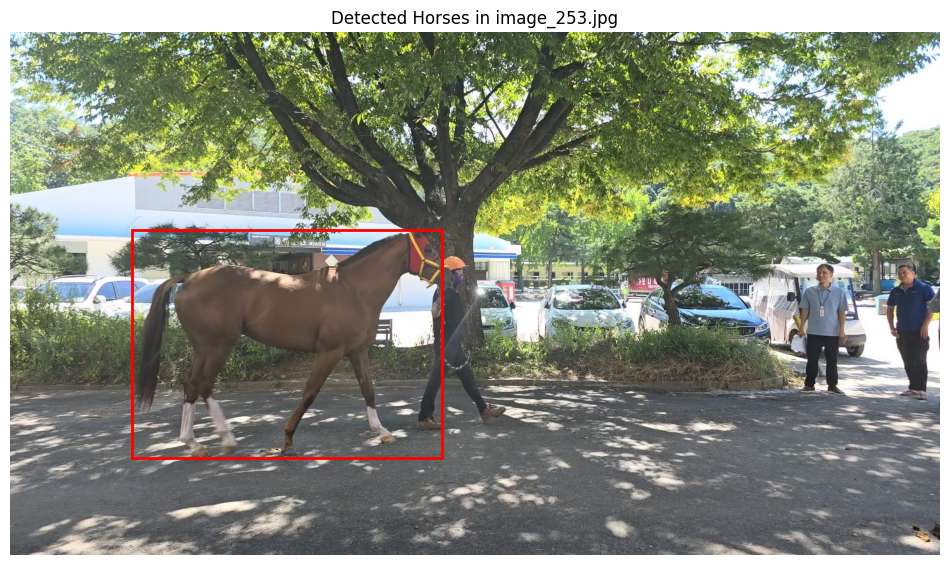

In [18]:
model = YOLO('yolov8m.pt')  # 또는 다른 YOLO 모델을 사용할 수 있습니다

import matplotlib.pyplot as plt

def display_image_with_boxes(image_name, image_folder, df):
    # 이미지 파일의 전체 경로 생성
    image_path = os.path.join(image_folder, image_name)
    
    # 이미지가 존재하는지 확인
    if not os.path.exists(image_path):
        print(f"이미지 파일을 찾을 수 없습니다: {image_name}")
        return
    
    # 이미지 로드
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 해당 이미지에 대한 바운딩 박스 정보 필터링
    image_boxes = df[df['filename'] == image_name]
    
    # 이미지 표시
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    
    # 바운딩 박스 그리기
    for _, box in image_boxes.iterrows():
        x, y, w, h = box['x'], box['y'], box['w'], box['h']
        rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    
    plt.title(f"Detected Horses in {image_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_name = "image_253.jpg"  # 출력하고 싶은 이미지의 파일명
display_image_with_boxes(image_name, image_folder, df)